
## Task 2.2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [20]:
iris = load_iris()

X = iris.data
y = iris.target

#seleccionar Setosa (0) y Versicolor (1)
mask = y != 2
X = X[mask]
y = y[mask]

#seleccionar sepal length y sepal width
X = X[:, :2]

#convertir etiquetas a {-1, 1}
y = np.where(y == 0, -1, 1)

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Label"] = y

df.head()

,Sepal Length,Sepal Width,Label
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


In [21]:
df.describe()

,Sepal Length,Sepal Width,Label
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,0.000000
std,0.641698,0.478739,1.005038
min,4.300000,2.000000,-1.000000
25%,5.000000,2.800000,-1.000000
50%,5.400000,3.050000,0.000000
75%,5.900000,3.400000,1.000000
max,7.000000,4.400000,1.000000


como sugerencia y a manera de comparación se usará también el 80/20, porque cuando se entrena con todo el dataset y luego se mide el accuracy sobre los mismos datos se está evaluando qué tan bien el modelo recuerda lo que ya vio, no mide qué tan bien funcionará con datos nuevos.

In [22]:
#división manual 80/20
np.random.seed(42)
indices = np.random.permutation(len(X))

split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


Datos antes de entrenar el perceptron

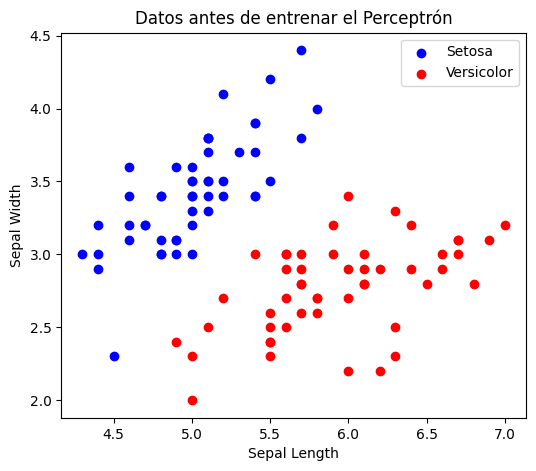

In [23]:
plt.figure(figsize=(6,5))

plt.scatter(X[y==-1][:,0], X[y==-1][:,1],
            color='blue', label='Setosa')

plt.scatter(X[y==1][:,0], X[y==1][:,1],
            color='red', label='Versicolor')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Datos antes de entrenar el Perceptrón")
plt.show()

Inicialización

w = w + ηyx

𝑏 = 𝑏 + 𝜂𝑦

In [24]:
class Perceptron:
     
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
            
        self.w = np.random.randn(n_features)
        self.b = np.random.randn()

        #entrenamiento
        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.w) + self.b
                    
                #activar función Sign
                y_pred = self.sign(linear_output)
                    
                #actualizar si está mal clasificado
                if y[i] * y_pred <= 0:
                        self.w += self.lr * y[i] * X[i]
                        self.b += self.lr * y[i]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return self.sign(linear_output)
        
    def sign(self, z):
        return np.where(z >= 0, 1, -1)

Entrenamiento

In [25]:
model = Perceptron(lr=0.01, epochs=100)
model.fit(X, y)

Frontera de decisión

w1​x1 ​+ w2x2 ​+ b = 0

x2 ​= −(​w1​x1 ​+ b​) / w2

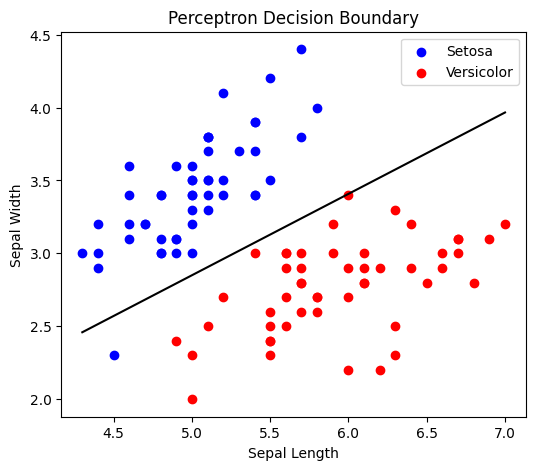

In [26]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(6,5))
    
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1],
                color='blue', label='Setosa')
    plt.scatter(X[y==1][:,0], X[y==1][:,1],
                color='red', label='Versicolor')
    
    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_vals = -(model.w[0]*x_vals + model.b) / model.w[1]
    
    plt.plot(x_vals, y_vals, color='black')
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

plot_decision_boundary(X, y, model)

Accuracy

In [27]:
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.99


80/20

In [28]:
model.fit(X_train, y_train)

In [29]:
model = Perceptron(lr=0.01, epochs=100)
model.fit(X_train, y_train)

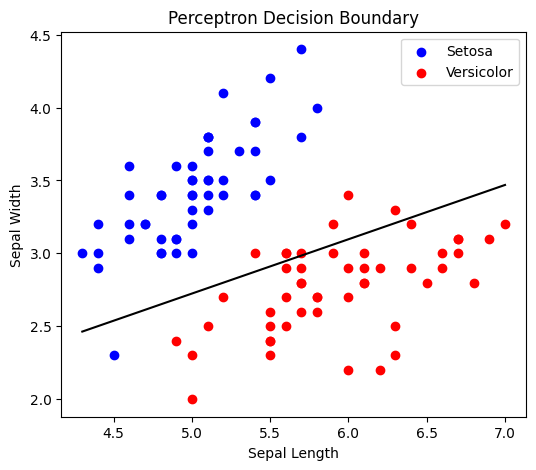

In [30]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(6,5))
    
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1],
                color='blue', label='Setosa')
    plt.scatter(X[y==1][:,0], X[y==1][:,1],
                color='red', label='Versicolor')
    
    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_vals = -(model.w[0]*x_vals + model.b) / model.w[1]
    
    plt.plot(x_vals, y_vals, color='black')
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

plot_decision_boundary(X, y, model)

In [31]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95
